# The Sparks Foundation
# Intern name : Rana Maher Mohammed
# Task 1 :
# Predict the percentage of a student based on the no. of study hours.

# Dataset : http://bit.ly/w-data
# To Predict What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# Visualising Data

In [3]:

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Checking For Null Values

In [5]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
df.shape   #rows,columns

(25, 2)

In [8]:
df.size   #rows*columns

50

In [9]:
df.columns  

Index(['Hours', 'Scores'], dtype='object')

In [10]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Cleaning

In [12]:

df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [13]:
df[df.duplicated()]      #if there are duplicates : df.drop_duplicates(inplace=true)

,Hours,Scores


# Making List Of Columns

In [14]:
columns = list(df.columns)

In [15]:
x = df["Hours"].values
y = df["Scores"].values

# Visualising Data

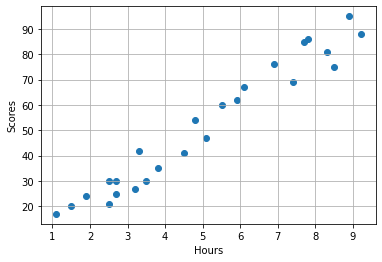

In [17]:
plt.scatter (x , y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

# Splitting Data

In [18]:
from sklearn.model_selection import train_test_split   

x_train , x_test , y_train , y_test = train_test_split ( x , y , test_size= 0.30 , random_state= 0)

In [19]:
# load modules of linear regression

from sklearn.linear_model import LinearRegression

#create linear regression object

x_train = x_train.reshape(-1, 1)
lr = LinearRegression()


# Train The Model

In [20]:

lr.fit(x_train,y_train)

LinearRegression()

In [21]:
line = lr.coef_*x + lr.intercept_

# visualising Train Data

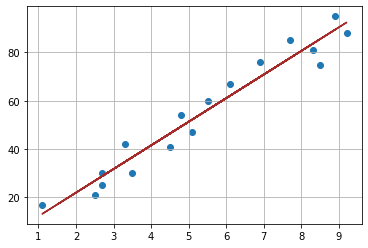

In [22]:
#visualizing train data

plt.scatter(x_train , y_train)
plt.plot (x,line , color="brown")
plt.grid()
plt.show()

# Prediction 

In [24]:

x_test = x_test.reshape(-1,1)
y_pre = lr.predict(x_test)


# Visualising Test Data

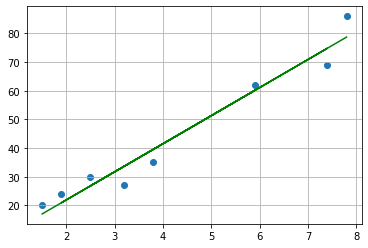

In [25]:

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pre, color = "green")
plt.grid()
plt.show()

# Evaluation

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

y_actual = y_test
y_predicted = y_pre

MSE = mean_squared_error(y_actual, y_predicted)
RMSE = math.sqrt(MSE)
print(RMSE)  

corr = r2_score(y_train, lr.predict(x_train))
print(corr)

acc = r2_score(y_test,y_pre)
print(acc)

4.792191274636315
0.9484997422695115
0.9568211104435257


# Making Prediction

In [34]:

hours = 9.25
predicted = lr.predict([[hours]])
print (" Predicted score is : " , predicted[0])

 Predicted score is :  92.91505723477056
